Практическая работа
1. Загрузить данные Market_Basket_Optimisation.csv.
2. Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров).
3. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).
4. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.
5. Сравнить время выполнения всех алгоритмов и построить гистограмму.
6. Загрузить данные data.csv.
7. Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров).
8. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).
9. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

10.Сравнить время выполнения всех алгоритмов и построить гистограмму.

11.Сформулировать выводы и сделать отчет.

# **Market_Basket_Optimisation.csv**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Market_Basket_Optimisation.csv')

In [ ]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

<Axes: >

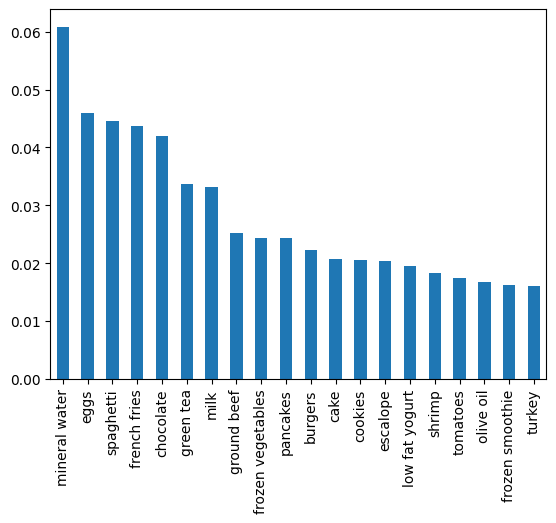

In [ ]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar') #относительная частота

In [ ]:
data.stack().value_counts().head(20).apply(lambda item: item / data.shape[0])

,count
mineral water,0.238267
eggs,0.179733
spaghetti,0.174133
french fries,0.170933
chocolate,0.164000
green tea,0.132000
milk,0.129600
ground beef,0.098267
frozen vegetables,0.095333
pancakes,0.095067


<Axes: >

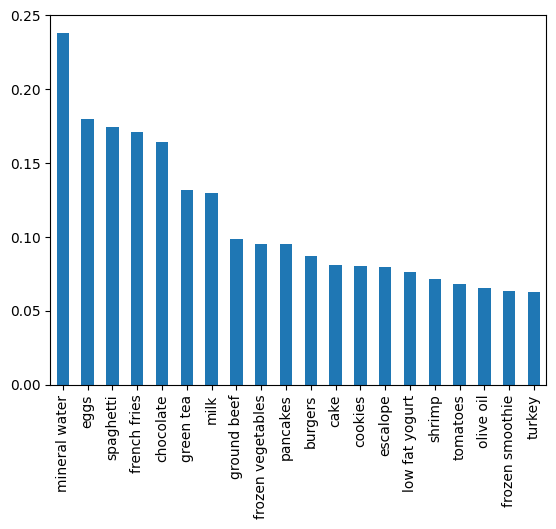

In [ ]:
data.stack().value_counts().head(20).apply(lambda item: item / data.shape[0]).plot(kind='bar') #фактическая частота

получается в 23 процентах корзин есть mineral water, в 17 процентах есть eggs и тд

In [ ]:
transactions = []

for i in range(data.shape[0]):
  row = data.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
transactions[0][0]

'burgers'

In [ ]:
transactions[0]

['burgers', 'meatballs', 'eggs']

## **apriori_python**

In [ ]:
from apriori_python import apriori

In [ ]:
import time

In [ ]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup = 0.04, minConf = 0.08)
time1 = (time.perf_counter()-start)
t.append(time1)

In [ ]:
rules

[[{'mineral water'}, {'ground beef'}, 0.17179630665920537],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

посчитали в скольких транзакциях сработало правило кто купил mineral water, тот купил и ground beef - это 17 процентов транзакций

купил mineral water, купил и milk  - это 20 процентов транзакций

 и тд

## **apyori**

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=13a16abe331c481c049288183f39b6148bc33186201c6d5940f847ddedc7771d
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
start = time.perf_counter()

rules = apriori(transactions=transactions,
                min_support = 0.04,
                min_confidence = 0.08,
                min_lift=1.0001)
results= list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

In [ ]:
results

[RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'chocolate'}), confidence=0.22104085058757697, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.05093333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.28338278931750743, lift=1.1893513821383916), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'eggs'}), confidence=0.21376608841634023, lift=1.1893513821383916)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), it

In [ ]:
for result in results:
  for subset in result[2]:
    print(subset[0],subset[1])
    print("Support: {0}; Confidence: {1}; lift: {2};".format(result[1],subset[2],subset[3]))
    print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence: 0.32139951179820997; lift: 1.3489067367020564;

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667; Confidence: 0.22104085058757697; lift: 1.3489067367020564;

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333; Confidence: 0.28338278931750743; lift: 1.1893513821383916;

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05093333333333333; Confidence: 0.21376608841634023; lift: 1.1893513821383916;

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040933333333333335; Confidence: 0.41655359565807326; lift: 1.7482663499919135;

frozenset({'mineral water'}) frozenset({'ground beef'})
Support: 0.040933333333333335; Confidence: 0.1717963066592054; lift: 1.7482663499919138;

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.048; Confidence: 0.3703703703703704; lift: 1.5544363613753656;

frozenset({'miner

тут тоже выяснили в скольких транзакциях сработало правило кто купил chocolate, тот купил и mineral water - это 32 процентов транзакций

купил mineral water, купил и chocolate  - это 22 процентов транзакций

 и тд

lift показывает насколько наши продукты зависят друг от друга. Т.е. наше правило, что mineral water покупают с chocolate, на 34.8% мощнее
правила, что mineral water просто покупают.



## **efficient_apriori**

In [ ]:
pip install efficient_apriori

In [ ]:
from efficient_apriori import apriori

In [ ]:
start = time.perf_counter()
items, rules = apriori(transactions,
                min_support = 0.04,
                min_confidence = 0.08)
time3 = (time.perf_counter()-start)
t.append(time3)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


тут тоже выяснили в скольких транзакциях сработало правило кто купил chocolate, тот купил и mineral water - это 32 процентов транзакций

купил mineral water, купил и chocolate  - это 22 процентов транзакций

 и тд

lift показывает насколько наши продукты зависят друг от друга. Т.е. наше правило, что mineral water покупают с chocolate, на 34.8% мощнее
правила, что mineral water просто покупают.

Conviction — это «частотность ошибок» нашего правила.
Т.е., например, как часто покупали chocolate без mineral water и наоборот. conviction
покупки chocolate и mineral water вместе был бы равен 1.2, это значит, что правило
«купил mineral water chocolate и подгузники» было бы в 1.12 раза (на 12%) более верным, чем
если бы совпадение этих items в одной транзакции было бы чисто случайным.

## **fpgrowth_py.**

In [ ]:
pip install fpgrowth_py

In [ ]:
from fpgrowth_py import fpgrowth

In [ ]:
start = time.perf_counter()
items, rules = fpgrowth(transactions,
                minSupRatio = 0.04,
                minConf = 0.08)
time4 = (time.perf_counter()-start)
t.append(time4)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]


## **Сравним время выполнения наших алгоритмов**

Время выполнения apriori:  1.539372297 

Время выполнения apriori 2:  0.052377673000023606 

Время выполнения efficient_apriori:  0.0290411309999854 

Время выполнения fpgrowth:  0.2610299269999814 



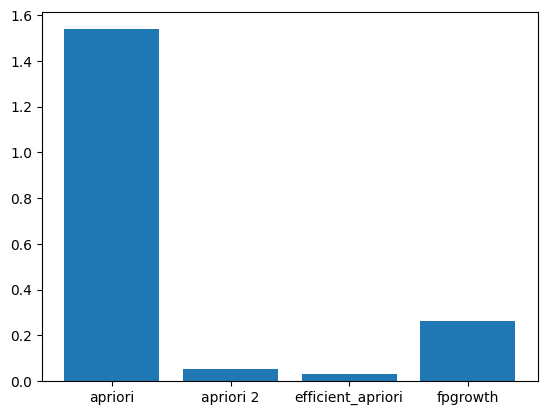

In [ ]:
import matplotlib.pyplot as plt
print("Время выполнения apriori: ", t[0], '\n')
print("Время выполнения apriori 2: ", t[1], '\n')
print("Время выполнения efficient_apriori: ", t[2], '\n')
print("Время выполнения fpgrowth: ", t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()

# **data.csv**

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


<Axes: >

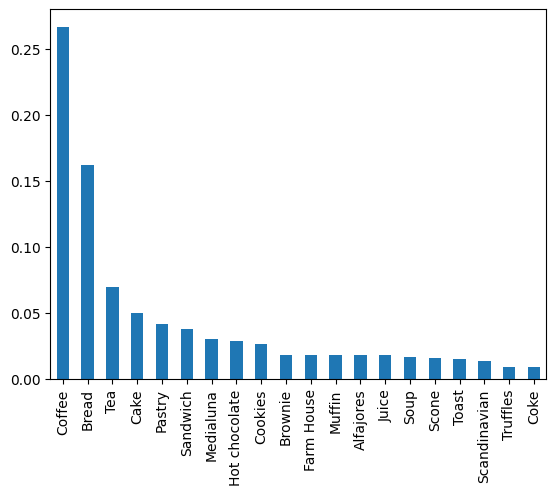

In [ ]:
df.stack().value_counts(normalize=True).head(20).plot(kind='bar') #относительная частота

<Axes: >

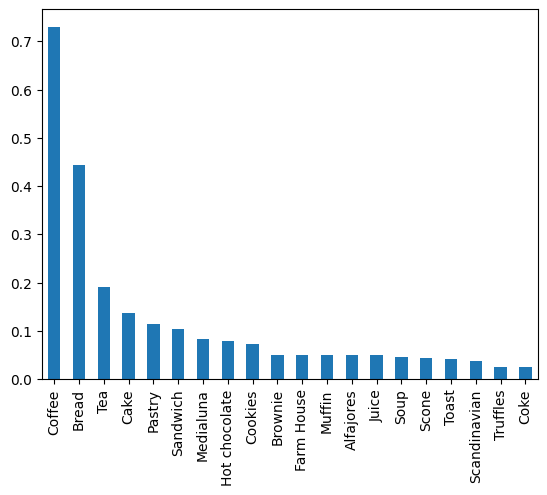

In [ ]:
df.stack().value_counts().head(20).apply(lambda item: item / data.shape[0]).plot(kind='bar') #фактическая частота

более чем в 70 процентах корзин есть кофе, примерно в 45 процентах корзин есть хлеб(bread) и тд

In [ ]:
transactions = []

for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
transactions[0][0]

'Scandinavian'

In [ ]:
transactions[0]

['Scandinavian', 'Scandinavian']

## **apriori_python**

In [ ]:
from apriori_python import apriori
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup = 0.04, minConf = 0.08)
time1 = (time.perf_counter()-start)
t.append(time1)
rules

[[{'Coffee'}, {'Pastry'}, 0.09938162544169611],
 [{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

выяснили в скольких транзакциях сработало правило кто купил coffee, тот купил и pastry - это примерно 9 процент транзакций
кто купил кофе тот купил и чай - это 10 процентов транзакций

## **apyori**

In [ ]:
from apyori import apriori
start = time.perf_counter()

rules = apriori(transactions=transactions,
                min_support = 0.04,
                min_confidence = 0.08,
                min_lift=1.0001)
results= list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

results

[RelationRecord(items=frozenset({'Cake', 'Coffee'}), support=0.05435466946484785, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Coffee'}), confidence=0.5269582909460834, lift=1.109079618532724), OrderedStatistic(items_base=frozenset({'Coffee'}), items_add=frozenset({'Cake'}), confidence=0.11439929328621908, lift=1.109079618532724)]),
 RelationRecord(items=frozenset({'Coffee', 'Pastry'}), support=0.0472193074501574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coffee'}), items_add=frozenset({'Pastry'}), confidence=0.09938162544169611, lift=1.162094344121919), OrderedStatistic(items_base=frozenset({'Pastry'}), items_add=frozenset({'Coffee'}), confidence=0.5521472392638037, lift=1.162094344121919)])]

In [ ]:
for result in results:
  for subset in result[2]:
    print(subset[0],subset[1])
    print("Support: {0}; Confidence: {1}; lift: {2};".format(result[1],subset[2],subset[3]))
    print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834; lift: 1.109079618532724;

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.05435466946484785; Confidence: 0.11439929328621908; lift: 1.109079618532724;

frozenset({'Coffee'}) frozenset({'Pastry'})
Support: 0.0472193074501574; Confidence: 0.09938162544169611; lift: 1.162094344121919;

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574; Confidence: 0.5521472392638037; lift: 1.162094344121919;



тут тоже выяснили в скольких транзакциях сработало правило кто купил cake, тот купил и coffee - это 5 процентов транзакций

купил coffee, купил и cake  - это 5 процентов транзакций

 и тд

lift показывает насколько наши продукты зависят друг от друга. Т.е. наше правило, что cake  покупают с coffee, на 10% мощнее
правила, что cake просто покупают.

## **efficient_apriori**

In [ ]:
from efficient_apriori import apriori
start = time.perf_counter()
items, rules = apriori(transactions,
                min_support = 0.04,
                min_confidence = 0.08)
time3 = (time.perf_counter()-start)
t.append(time3)

for i in range(len(rules)):
  print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Coffee} -> {Pastry} (conf: 0.099, supp: 0.047, lift: 1.162, conv: 1.015)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


тут тоже выяснили в скольких транзакциях сработало правило кто купил cake, тот купил и coffee - это 5 процентов транзакций

купил coffee, купил и cake  - это 5 процентов транзакций

 и тд

lift показывает насколько наши продукты зависят друг от друга. Т.е. наше правило, что cake  покупают с coffee, на 10% мощнее
правила, что cake просто покупают.

Conviction — это «частотность ошибок» нашего правила.
Т.е., например, как часто покупали cake без coffee и наоборот. conviction
покупки cake и coffee вместе был бы равен 1.1, это значит, что правило
«cake купил и coffee» было бы в 1.11 раза (на 11%) более верным, чем
если бы совпадение этих items в одной транзакции было бы чисто случайным.

In [ ]:
start = time.perf_counter()
items, rules = fpgrowth(transactions,
                minSupRatio = 0.04,
                minConf = 0.08)
time4 = (time.perf_counter()-start)
t.append(time4)

for i in range(len(rules)):
  print(rules[i])

[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Coffee'}, {'Pastry'}, 0.09938162544169611]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]


## **сравнение времени выполнения наших алгоритмов**

Время выполнения apriori:  0.37259557900006257 

Время выполнения apriori 2:  0.009800739999718644 

Время выполнения efficient_apriori:  0.016558239000005415 

Время выполнения fpgrowth:  0.14114525900004082 



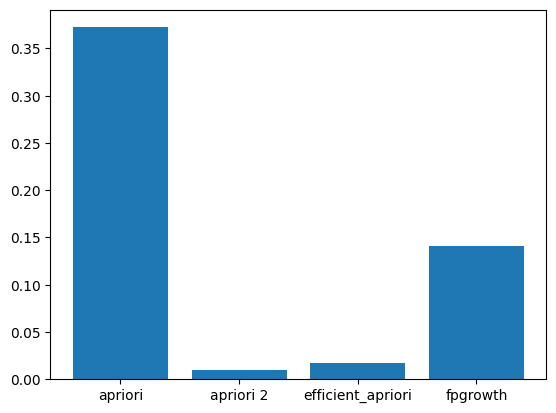

In [ ]:
import matplotlib.pyplot as plt
print("Время выполнения apriori: ", t[0], '\n')
print("Время выполнения apriori 2: ", t[1], '\n')
print("Время выполнения efficient_apriori: ", t[2], '\n')
print("Время выполнения fpgrowth: ", t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()